<a href="https://colab.research.google.com/github/Nitishagyawali/workshop1-of-AI/blob/main/Workshop4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Problem - 1: Perform a classification task with knn from scratch.*

*1. Load the Dataset:*

*• Read the dataset into a pandas DataFrame.*


In [3]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/drive/MyDrive/diabetes.csv");


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics)**



In [4]:
data.head()
data.dtypes
data.isnull().sum()
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


*2. Handle Missing Data:*

*• Handle any missing values appropriately, either by dropping or imputing them based on the data.*



In [14]:
for col in data.columns:
    if data[col].isnull().any():
        data[col].fillna(data[col].mean(), inplace=True)


*3. Feature Engineering:*

*• Separate the feature matrix (X) and target variable (y).*



In [13]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']


*• Perform a train - test split from scratch using a 70% − 30% ratio.*


In [10]:
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
  np.random.seed(random_seed)
  indices = np.arange(X.shape[0])
  np.random.shuffle(indices) # Shuffle the indices
  test_split_size = int(len(X) * test_size)
  test_indices = indices[:test_split_size]
  train_indices = indices[test_split_size:]
  X_train, X_test = X[train_indices], X[test_indices]
  y_train, y_test = y[train_indices], y[test_indices]
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_scratch(X.values, y.values, test_size=0.3, random_seed=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)


*• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).*

*• Compute distances using Euclidean distance.

In [11]:
def euclidean_distance(point1, point2):
  if point1.shape != point2.shape:
    raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")
  # Calculate the Euclidean distance
  distance = np.sqrt(np.sum((point1 - point2) ** 2))
  return distance



**• Write functions for:
– Predicting the class for a single query.**


In [15]:
def knn_predict_single(query, X_train, y_train, k=3):
  distances = [euclidean_distance(query, x) for x in X_train]
  sorted_indices = np.argsort(distances)
  nearest_indices = sorted_indices[:k]
  nearest_labels = y_train[nearest_indices]
  prediction = np.bincount(nearest_labels).argmax()
  return prediction



In [17]:
def knn_predict(X_test, X_train, y_train, k=3):

  predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
  return np.array(predictions)

try:
  # Define the test set for the test case
  X_test_sample = X_test[:5] # Taking a small subset for testing
  y_test_sample = y_test[:5] # Corresponding labels for the subset
  # Make predictions
  predictions = knn_predict(X_test_sample, X_train, y_train, k=3)
  # Print test results
  print("Predictions:", predictions)
  print("Actual labels:", y_test_sample)
  # Check if predictions match expected format
  assert predictions.shape == y_test_sample.shape, "The shape of predictions does not match the shape of the actual labels."
  print("Test case passed successfully!")
except AssertionError as ae:
  print(f"AssertionError: {ae}")
except Exception as e:
  print(f"An unexpected error occurred: {e}")


Predictions: [0 1 0 1 1]
Actual labels: [0 0 0 0 0]
Test case passed successfully!


*• Evaluate the performance using accuracy.*


In [18]:
def compute_accuracy(y_true, y_pred):

  correct_predictions = np.sum(y_true == y_pred)
  total_predictions = len(y_true)
  accuracy = (correct_predictions / total_predictions) * 100
  return accuracy

try:

  predictions = knn_predict(X_test, X_train, y_train, k=3)
  # Compute the accuracy
  accuracy = compute_accuracy(y_test, predictions)
  # Print the accuracy
  print(f"Accuracy of the KNN model on the test set: {accuracy:.2f}%")
except Exception as e:
  print(f"An unexpected error occurred during prediction or accuracy computation: {e}")


Accuracy of the KNN model on the test set: 67.39%


# *Problem - 2 - Experimentation:*

*1. Repeat the Classification Task:*

*• Scale the Feature matrix X.*


In [19]:
def min_max_scaling(data):

    min_vals = np.min(data, axis=0)
    max_vals = np.max(data, axis=0)
    scaled_data = (data - min_vals) / (max_vals - min_vals)
    return scaled_data


X_train_scaled = min_max_scaling(X_train)
X_test_scaled = min_max_scaling(X_test)


*• Use the scaled data for training and testing the kNN Classifier.*


In [20]:
try:
  predictions_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train, k=3)
  accuracy_scaled = compute_accuracy(y_test, predictions_scaled)
  print(f"Accuracy of the KNN model on the scaled test set: {accuracy_scaled:.2f}%")
except Exception as e:
  print(f"An error occurred during prediction or accuracy computation with scaled data: {e}")




Accuracy of the KNN model on the scaled test set: 70.87%



*2. Comparative Analysis: Compare the Results -*


In [21]:

import time

print("Comparison of kNN model performance:")
print(f"- Accuracy on original data: {accuracy:.2f}%")
print(f"- Accuracy on scaled data: {accuracy_scaled:.2f}%")



start_time = time.time()
predictions = knn_predict(X_test, X_train, y_train, k=3)
end_time = time.time()
original_time = end_time - start_time

start_time_scaled = time.time()
predictions_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train, k=3)
end_time_scaled = time.time()
scaled_time = end_time_scaled - start_time_scaled

print("\nPerformance comparison (time taken for prediction):")
print(f"- Time taken for original data: {original_time:.4f} seconds")
print(f"- Time taken for scaled data: {scaled_time:.4f} seconds")


Comparison of kNN model performance:
- Accuracy on original data: 67.39%
- Accuracy on scaled data: 70.87%

Performance comparison (time taken for prediction):
- Time taken for original data: 1.6483 seconds
- Time taken for scaled data: 1.4777 seconds


# *Problem - 3 - Experimentation with k:*

*1. Vary the number of neighbors - k:*


In [23]:

k_values = range(1, 16)

original_accuracies = []
scaled_accuracies = []
original_times = []
scaled_times = []


for k in k_values:

    start_time = time.time()
    predictions = knn_predict(X_test, X_train, y_train, k=k)
    end_time = time.time()
    original_accuracy = compute_accuracy(y_test, predictions)
    original_accuracies.append(original_accuracy)
    original_times.append(end_time - start_time)

    # Scaled dataset
    start_time_scaled = time.time()
    predictions_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train, k=k)
    end_time_scaled = time.time()
    scaled_accuracy = compute_accuracy(y_test, predictions_scaled)
    scaled_accuracies.append(scaled_accuracy)
    scaled_times.append(end_time_scaled - start_time_scaled)


print("\nPerformance for different values of k:")
for i, k in enumerate(k_values):
    print(f"k = {k}:")
    print(f"  - Original Accuracy: {original_accuracies[i]:.2f}%")
    print(f"  - Scaled Accuracy: {scaled_accuracies[i]:.2f}%")
    print(f"  - Original Time: {original_times[i]:.4f} seconds")
    print(f"  - Scaled Time: {scaled_times[i]:.4f} seconds")




Performance for different values of k:
k = 1:
  - Original Accuracy: 68.70%
  - Scaled Accuracy: 70.00%
  - Original Time: 0.8744 seconds
  - Scaled Time: 1.0707 seconds
k = 2:
  - Original Accuracy: 72.61%
  - Scaled Accuracy: 70.43%
  - Original Time: 0.8667 seconds
  - Scaled Time: 0.8719 seconds
k = 3:
  - Original Accuracy: 67.39%
  - Scaled Accuracy: 70.87%
  - Original Time: 0.8753 seconds
  - Scaled Time: 0.8320 seconds
k = 4:
  - Original Accuracy: 72.17%
  - Scaled Accuracy: 71.74%
  - Original Time: 0.8728 seconds
  - Scaled Time: 0.8832 seconds
k = 5:
  - Original Accuracy: 68.70%
  - Scaled Accuracy: 71.74%
  - Original Time: 0.8586 seconds
  - Scaled Time: 0.8720 seconds
k = 6:
  - Original Accuracy: 70.00%
  - Scaled Accuracy: 73.48%
  - Original Time: 0.9171 seconds
  - Scaled Time: 1.4672 seconds
k = 7:
  - Original Accuracy: 69.13%
  - Scaled Accuracy: 71.74%
  - Original Time: 1.4838 seconds
  - Scaled Time: 1.4361 seconds
k = 8:
  - Original Accuracy: 71.30%
  - Sc

*2. Visualize the Results:*

*• Plot the following graphs:*

*– k vs. Accuracy for original and scaled datasets.*


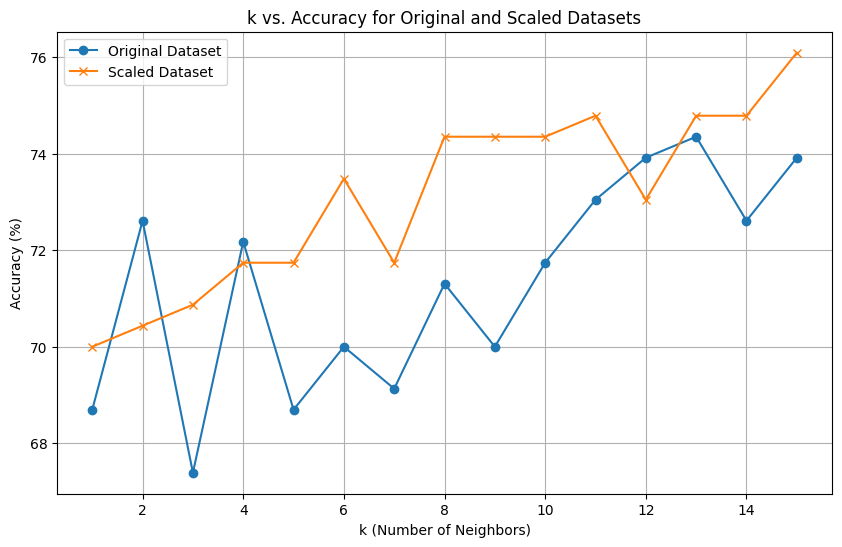

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, original_accuracies, marker='o', label='Original Dataset')
plt.plot(k_values, scaled_accuracies, marker='x', label='Scaled Dataset')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy (%)')
plt.title('k vs. Accuracy for Original and Scaled Datasets')
plt.legend()
plt.grid(True)
plt.show()


*– k vs. Time Taken for original and scaled datasets.*


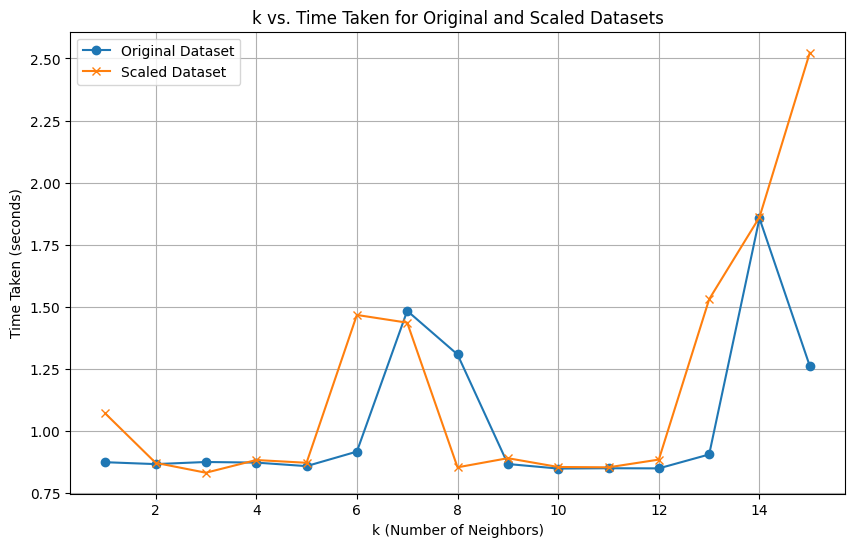

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, original_times, marker='o', label='Original Dataset')
plt.plot(k_values, scaled_times, marker='x', label='Scaled Dataset')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Time Taken (seconds)')
plt.title('k vs. Time Taken for Original and Scaled Datasets')
plt.legend()
plt.grid(True)
plt.show()


*• Discuss how the choice of k affects the accuracy and computational cost.*


In [26]:
print("Discussion on the choice of k:")
print("Smaller values of k (e.g., k=1, 2, 3):")
print("  - Higher accuracy in some cases due to capturing local patterns, but can be sensitive to noise or outliers.")
print("  - Lower computational cost since fewer distances need to be calculated.")
print("Larger values of k (e.g., k=10, 15):")
print("  - Smoother decision boundaries, less sensitive to noise and outliers.")
print("  - Higher computational cost due to calculating more distances.")
print("Optimal k:")
print("  - Finding the optimal value of k depends on dataset characteristics, and is often determined through techniques like cross-validation.")
print("  - A larger k usually leads to a smoother decision boundary and lower variance but could lead to higher bias.")


Discussion on the choice of k:
Smaller values of k (e.g., k=1, 2, 3):
  - Higher accuracy in some cases due to capturing local patterns, but can be sensitive to noise or outliers.
  - Lower computational cost since fewer distances need to be calculated.
Larger values of k (e.g., k=10, 15):
  - Smoother decision boundaries, less sensitive to noise and outliers.
  - Higher computational cost due to calculating more distances.
Optimal k:
  - Finding the optimal value of k depends on dataset characteristics, and is often determined through techniques like cross-validation.
  - A larger k usually leads to a smoother decision boundary and lower variance but could lead to higher bias.


*• Identify the optimal k based on your analysis.*


In [27]:
optimal_k = k_values[np.argmax(scaled_accuracies)]
print(f"\nOptimal k based on accuracy for the scaled dataset: {optimal_k}")


Optimal k based on accuracy for the scaled dataset: 15
